In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_colwidth=300

In [11]:
# Shingle generators 
# Arguments : Message string, shingle size {in words}
# Returns : All shingles formed with k words
def shingle_generator(message, k):
    message = message.split(' ')
    item_set = []
    for i in range(0, len(message)-k):
        shingle =  ""
        for j in range(0, k):
            shingle = shingle + message[i+j] + " "
        item_set.append(shingle)
    return item_set

In [12]:
def jaccard_similarity(str1, str2):
    string_set1 = set(str1.split(' '))
    string_set2 = set(str2.split(' '))
    return len(string_set1.intersection(string_set2))/len(string_set2.union(string_set1))

In [22]:
# dump pkl into a pandas dataframe. 
data = pd.read_pickle('data/string_study.pkl')

In [23]:
data["word_count"] = data._info.apply(lambda x:len(x.split(' ')))
data.head(7)
# data = data.query("word_count == 14")
# data

,atime,task,deployment,raw,dtime,msg,_info,word_count
0,1524387149611,attach-volume,wig_project_003,2018-04-22 10:52:29.611 17979 ERROR rallytester.rallytester [-] [nova attach-volume wig_project_003] Task failed: Rally tired waiting 1440.00 seconds for Server rally-9db3-aPln:176b6fd3-8a2d-4b60-a5bd-73575c4ad161 to become ('ACTIVE') current status BUILD,2018-04-22 08:00:00,waiting for Server to become ('ACTIVE'),Rally tired waiting 1440.00 seconds for Server rally-9db3-aPln:176b6fd3-8a2d-4b60-a5bd-73575c4ad161 to become ('ACTIVE') current status BUILD,14
1,1524387185889,boot-from-volume-linux,gva_shared_016,"2018-04-22 10:53:05.889 25667 ERROR rallytester.rallytester [-] [nova boot-from-volume-linux gva_shared_016] Task failed: Quota exceeded for cores, instances: Requested 1, 1, but already used 10, 10 of 10, 10 cores, instances (HTTP 403) (Request-ID: req-23b5fe81-0bab-4f42-84e9-97e3e6847c04)",2018-04-22 08:00:00,"Quota exceeded for cores, instances: Requested ..... cores, instances (HTTP 403) (Request-ID: req-xy","Quota exceeded for cores, instances: Requested 1, 1, but already used 10, 10 of 10, 10 cores, instances (HTTP 403) (Request-ID: req-23b5fe81-0bab-4f42-84e9-97e3e6847c04)",22
2,1524387196073,boot-linux,gva_shared_016,"2018-04-22 10:53:16.073 25840 ERROR rallytester.rallytester [-] [nova boot-linux gva_shared_016] Task failed: Quota exceeded for cores, instances: Requested 1, 1, but already used 10, 10 of 10, 10 cores, instances (HTTP 403) (Request-ID: req-f1b55ece-6bd1-475b-9692-7e443d44d52b)",2018-04-22 08:00:00,"Quota exceeded for cores, instances: Requested ..... cores, instances (HTTP 403) (Request-ID: req-xy","Quota exceeded for cores, instances: Requested 1, 1, but already used 10, 10 of 10, 10 cores, instances (HTTP 403) (Request-ID: req-f1b55ece-6bd1-475b-9692-7e443d44d52b)",22
3,1524387321429,boot-linux,gva_project_013,2018-04-22 10:55:21.429 19322 ERROR rallytester.rallytester [-] [nova boot-linux gva_project_013] Task failed: Rally tired waiting 1440.00 seconds for Server rally-15fc-N4mw:77640b75-df94-4e6d-91d6-3338fffcdc91 to become ('ACTIVE') current status BUILD,2018-04-22 08:00:00,waiting for Server to become ('ACTIVE'),Rally tired waiting 1440.00 seconds for Server rally-15fc-N4mw:77640b75-df94-4e6d-91d6-3338fffcdc91 to become ('ACTIVE') current status BUILD,14
4,1524387330897,attach-volume,gva_project_023,2018-04-22 10:55:30.897 19363 ERROR rallytester.rallytester [-] [nova attach-volume gva_project_023] Task failed: Rally tired waiting 1440.00 seconds for Server rally-1c07-9a14:c7c5f878-2495-45bf-873d-da11b5d88001 to become ('ACTIVE') current status BUILD,2018-04-22 08:00:00,waiting for Server to become ('ACTIVE'),Rally tired waiting 1440.00 seconds for Server rally-1c07-9a14:c7c5f878-2495-45bf-873d-da11b5d88001 to become ('ACTIVE') current status BUILD,14
5,1524387435712,ping-linux,pre_stage,2018-04-22 10:57:15.712 23909 ERROR rallytester.rallytester [-] [nova ping-linux pre_stage] Task failed: Rally tired waiting 300.00 seconds for Server rally-31bd-EnVg:39170e31-04b1-485f-b0fd-ecadfb0894a9 to become ('DELETED') current status ACTIVE,2018-04-22 08:00:00,waiting for Server to become ('DELETED'),Rally tired waiting 300.00 seconds for Server rally-31bd-EnVg:39170e31-04b1-485f-b0fd-ecadfb0894a9 to become ('DELETED') current status ACTIVE,14
6,1524387601470,boot-linux-with-dns,gva_shared_010,"2018-04-22 11:00:01.470 27861 ERROR rallytester.rallytester [-] [nova boot-linux-with-dns gva_shared_010] Task failed: Quota exceeded for instances: Requested 1, but already used 5 of 5 instances (HTTP 403) (Request-ID: req-8318ddf1-f0cf-4a28-b238-59fddfbc8326)",2018-04-22 09:00:00,"Quota exceeded for instances: Requested 1, but already used 5 of 5 instances (HTTP 403) (Request-ID:","Quota exceeded for instances: Requested 1, but already used 5 of 5 instances (HTTP 403) (Request-ID: req-8318ddf1-f0cf-4a28-b238-59fddfbc8326)",17


In [24]:
# msg_array = np.array(data._info.copy())
# msg_array

In [25]:
class_by_len_set = set(data.word_count)

In [29]:
len(class_by_len_set)

45

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f65b978>,
      dtype=object)

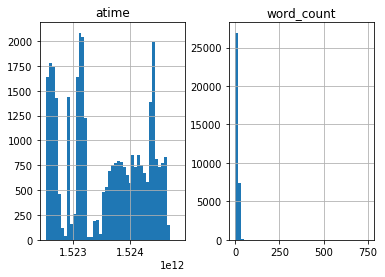

In [28]:
data.hist(bins = len(class_by_len_set))

In [9]:
# Taking the smallest one to test minhash algo
len(data.query("word_count == 5"))

47

In [43]:
filtered_data = data.query("word_count == 5")
# filtered_data.head(6577)
# filtered_data.iloc[474]

atime                                                                                                                                                                                                                 1522790169463
task                                                                                                                                                                                                      create-check-delete-stack
deployment                                                                                                                                                                                                                     heat
raw           2018-04-03 23:16:09.463 9373 ERROR rallytester.rallytester [-] [heat create-check-delete-stack heat] Task failed:  Request to https://openstack.cern.ch:8004/v1/52ec3808-5964-49f9-bd1b-310119c71764/stacks timed out
dtime                                                                                   

In [29]:
len((np.array(filtered_data._info)))

475

In [11]:
msg_array = np.array(filtered_data._info.copy())
jaccard_sim_set = []
jaccard_matrix = [[0 for i in range(len(msg_array))] for j in range(len(msg_array))]
for i in range(0, len(msg_array)):
    jaccard_matrix[i][i] = 1
    for j in range(i+1, len(msg_array)):
        jaccard_sim = jaccard_similarity(msg_array[i], msg_array[j])
        jaccard_sim_set.append(jaccard_sim)
        jaccard_matrix[i][j] = jaccard_sim
        jaccard_matrix[j][i] = jaccard_sim
set(jaccard_sim_set)

{0.0, 0.6666666666666666, 1.0}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f0195f8>]],
      dtype=object)

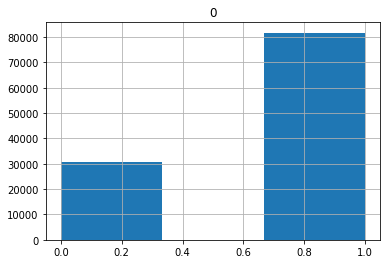

In [12]:
jaccard_dataframe = pd.DataFrame(jaccard_sim_set)
jaccard_dataframe.hist(bins = 3)

In [13]:
raw_msgs = filtered_data._info

In [14]:
# quer_str = "_info == " + raw_msgs.iloc[1]
# filtered_data.query(str)
data.iloc[27825]

atime                                                                                                                                                                                                                                                                                                       1522919580867
task                                                                                                                                                                                                                                                                                                         reboot-linux
deployment                                                                                                                                                                                                                                                                                                             qa
raw           2018-04-05 11:13:00.867 25397 ERROR rallytes

In [15]:
# raw_msgs

In [16]:
# raw_msgs = pd.DataFrame(raw_msgs, columns=["_info"])

In [17]:
# Generate the set of words of all raw messages
message_set = []
# %time

for item in np.array(raw_msgs):
#     print(item)
    item = str(item)
    set_of_words = set(item.split(' '))
    # Shingle size is set to 3 words
    set_of_words = set(shingle_generator(item, 2))
    message_set.append(set_of_words)


In [18]:
import numpy as np
import csv
import pandas
from datasketch import MinHash, MinHashLSH

In [19]:
# Generate MinHash instances for all messages
m = []
for i in range (0, len(message_set)):
    m_temp = MinHash(num_perm=128)
    m.append(m_temp)
len(m)

475

In [20]:
i = 0
for message in message_set:
    for word in message:
        m[i].update(word.encode('utf-8'))
    i = i + 1

In [21]:
# Create an LSH indexb
# %time
lsh = MinHashLSH(threshold=.35, num_perm=128)
count = 0
# for i in range (0, len(m)):
for index, row in filtered_data.iterrows():
    string = "m" + str(index)
    lsh.insert(string, m[count])
    count += 1
print (count)

475


In [22]:
# Find all the messages similar to the fist message with a specified threshold
%time
result = lsh.query(m[0])
# (result)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


In [25]:
# Repeat the clustering proc for every message. 
clusters = {}
cluster_count = 1
# For every message add the result to the cluster
for i in range(0, len(m)):
    # check if the message belongs to any cluster
    msg_str = "m" + str(i)
    flag = 1
    for item in clusters.values():
        if msg_str in item:
            flag = 0
            break
    # End of check box
    if flag:
        result = lsh.query(m[i])
        clusters[cluster_count] = result
        cluster_count += 1

In [26]:
clusters

{1: ['m396',
  'm7824',
  'm1809',
  'm7278',
  'm15454',
  'm30779',
  'm33139',
  'm7244',
  'm8853',
  'm7213',
  'm2110',
  'm6594',
  'm7856',
  'm30778',
  'm8715',
  'm11',
  'm7027',
  'm30917',
  'm7354',
  'm31653',
  'm31855',
  'm31863',
  'm15326',
  'm2065',
  'm6453',
  'm8962',
  'm30763',
  'm784',
  'm6070',
  'm31864',
  'm820'],
 2: ['m58'],
 3: ['m148'],
 4: ['m244'],
 5: ['m301'],
 6: ['m2215', 'm450', 'm1988', 'm1915', 'm2244', 'm2770', 'm1981', 'm352'],
 7: ['m372',
  'm8547',
  'm8574',
  'm8127',
  'm7701',
  'm8446',
  'm2510',
  'm7207',
  'm7543',
  'm6789',
  'm8936',
  'm30767',
  'm33134',
  'm8142',
  'm30952',
  'm7257',
  'm8228'],
 8: ['m396', 'm2110', 'm6594', 'm11', 'm30917', 'm6453'],
 9: ['m401'],
 10: ['m431'],
 11: ['m5829', 'm8230', 'm30813', 'm33082', 'm443'],
 12: ['m2215', 'm450', 'm1988', 'm1915', 'm2244', 'm2770', 'm1981', 'm352'],
 13: ['m30809',
  'm30744',
  'm6522',
  'm499',
  'm8233',
  'm7856',
  'm7466',
  'm30917',
  'm2688'],
 1